# Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#To ignore warnings

import warnings
warnings.filterwarnings("ignore")

In [5]:
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)
pd.set_option('display.width' , None)

# Import Dataset

if we have any padded spaces around column values in our dataset, Delimiter is used to remove it

In [6]:
adult_df = pd.read_csv(r'C:\Users\Hp\Desktop\data science\Python\Datasets\adult_data.csv' , header= None , 
                      delimiter =' *, *' , engine = 'python') 
adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# EDA

In [7]:
adult_df.shape

(32561, 15)

In this dataset, columns are without any heading/name, hence we have to manually give a meaningfull name to columns

In [8]:
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation', 'relationship',
'race', 'sex', 'capital_gain', 'capital_loss',
'hours_per_week', 'native_country', 'income']

adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


We will create a copy of our existing dataset and work on it 

In [9]:
adult_df_rev = pd.DataFrame.copy(adult_df)

Dropping education and fnlwgt based on domain knowledge

education - we already have an variable education_num which gives us number of years one has studied
            Thus what degree a person has done is irrelevant to us
            
fnlwgt - It is of no use, as weight wont have any impact affecting one's salary

In [10]:
adult_df_rev = adult_df_rev.drop(['education' , 'fnlwgt'] , axis = 1)

In [11]:
adult_df_rev.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Missing value check

In [12]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

We have observed that in workclass, occuppation, native_country there are some rows where value is '?' which is a missing value but above code was not able to catch it
Now we have to replace such values and consider it as a missing value

In [13]:
adult_df_rev = adult_df_rev.replace(['?'] , np.nan) 

In [14]:
adult_df_rev.isnull().sum()

age                  0
workclass         1836
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

Now we have 3 columns with missing value

# Missing value treatment

For categorical columns, we have replace then missing value by its mode

In [15]:
for value in ['workclass' , 'occupation' , 'native_country']:
    adult_df_rev[value].fillna(adult_df_rev[value].mode()[0] , inplace =True)

In [16]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Missing value handled

# Outlier check

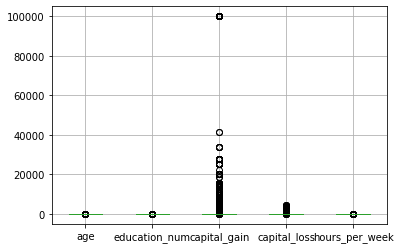

In [17]:
adult_df_rev.boxplot() 
plt.show()

For better visualization we can use below code

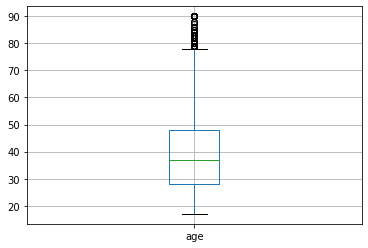

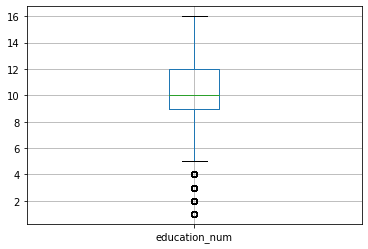

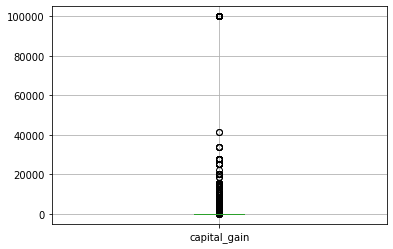

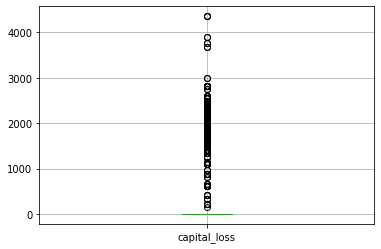

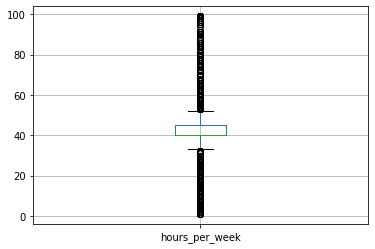

In [18]:
# to generate boxplot for all numerical varibales

import matplotlib.pyplot as plt
colname=[]
for x in adult_df_rev.columns[:-1]:
    if adult_df_rev[x].dtype=="int64" or adult_df_rev[x].dtype=="float64":
        colname.append(x)

for x in colname:
    adult_df_rev.boxplot(column=x)
    plt.show()

It is not suggested to treat a cluster of outlier points as it will create biasness in our dataset
Also We do not impute money related variable
Thus we will treat age and education_num only

# Outlier imputation

Treating age variable

In [19]:
q1 =adult_df_rev['age'].quantile(0.25) #first quartile value
q3 =adult_df_rev['age'].quantile(0.75) #third quartile value
iqr = q3 - q1 #interquartile range
low = q1 - 1.5*iqr #acceptable range
high = q3 + 1.5*iqr #acceptable range


In [20]:
adult_df_rev_include = adult_df_rev.loc[(adult_df_rev['age'] >= low) &\
                               (adult_df_rev['age'] <= high)]
# \ is a line continuation keyword
adult_df_rev_exclude = adult_df_rev.loc[(adult_df_rev['age'] < low) | \
                               (adult_df_rev['age'] > high)]

In [21]:
adult_df_rev_include.shape

(32418, 13)

In [22]:
adult_df_rev_exclude.shape

(143, 13)

Now we have seperated outlier points
We will use capping and flooring technique to treat this outlier points

In [23]:
#Using capping technique
adult_df_rev_exclude.loc[adult_df_rev_exclude['age'] < low, 'age'] = low
adult_df_rev_exclude.loc[adult_df_rev_exclude['age'] > high, 'age'] = high

In [24]:
adult_df_rev = pd.concat([adult_df_rev_include , adult_df_rev_exclude])

adult_df_rev.shape

(32561, 13)

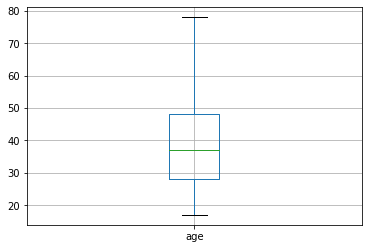

In [25]:
adult_df_rev.boxplot(column = 'age') 
plt.show()

Age variable has been treated as per expection
Now we will work on education_num

In [26]:
q1 =adult_df_rev['education_num'].quantile(0.25) #first quartile value
q3 =adult_df_rev['education_num'].quantile(0.75) #third quartile value
iqr = q3 - q1 #interquartile range
low = q1 - 1.5*iqr #acceptable range
high = q3 + 1.5*iqr #acceptable range


In [27]:
adult_df_rev_include = adult_df_rev.loc[(adult_df_rev['education_num'] >= low) &\
                               (adult_df_rev['education_num'] <= high)]
# \ is a line continuation keyword
adult_df_rev_exclude = adult_df_rev.loc[(adult_df_rev['education_num'] < low) | \
                               (adult_df_rev['education_num'] > high)]


In [28]:
adult_df_rev_include.shape

(31363, 13)

In [29]:
adult_df_rev_exclude.shape

(1198, 13)

In [30]:
#Using capping technique
adult_df_rev_exclude.loc[adult_df_rev_exclude['education_num'] < low, 'education_num'] = low
adult_df_rev_exclude.loc[adult_df_rev_exclude['education_num'] > high, 'education_num'] = high


In [31]:
adult_df_rev = pd.concat([adult_df_rev_include , adult_df_rev_exclude])

adult_df_rev.shape

(32561, 13)

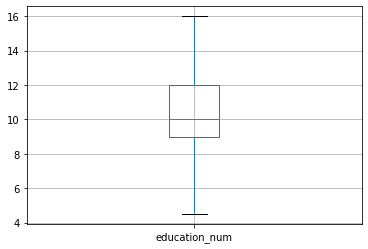

In [32]:
adult_df_rev.boxplot(column = 'education_num') 
plt.show()

Education_num has been treated as per expection

# Converting categorical variable to numeric

In [33]:
colname=[]
for x in adult_df_rev.columns[:]:
    if adult_df_rev[x].dtype=='object':
        colname.append(x)
colname

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [34]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for x in colname:
    adult_df_rev[x] = le.fit_transform(adult_df_rev[x])

In [35]:
adult_df_rev.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39.0,6,13.0,4,0,1,4,1,2174,0,40,38,0
1,50.0,5,13.0,2,3,0,4,1,0,0,13,38,0
2,38.0,3,9.0,0,5,1,4,1,0,0,40,38,0
3,53.0,3,7.0,2,5,0,2,1,0,0,40,38,0
4,28.0,3,13.0,2,9,5,2,0,0,0,40,4,0


Y variable assignment

0 means  <= 50k

1 means  >= 50k


In [36]:
adult_df_rev.dtypes
#crosscheck - if everything is converted to numeric variables

age               float64
workclass           int32
education_num     float64
marital_status      int32
occupation          int32
relationship        int32
race                int32
sex                 int32
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country      int32
income              int32
dtype: object

# Seperate X and Y

In [37]:
X = adult_df_rev.values[: , :-1]
Y = adult_df_rev.values[: , -1]

# Scaling

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X) 
print(X)

[[ 0.03278248  2.62429763  1.16910267 ... -0.21665953 -0.03542945
   0.26136999]
 [ 0.84423596  1.72109965  1.16910267 ... -0.21665953 -2.22215312
   0.26136999]
 [-0.04098602 -0.08529633 -0.45709061 ... -0.21665953 -0.03542945
   0.26136999]
 ...
 [ 2.90975392  1.72109965 -2.28655805 ... -0.21665953  0.36951938
  -1.88527792]
 [ 2.90975392  1.72109965 -2.28655805 ... -0.21665953 -1.65522476
   0.26136999]
 [ 2.90975392 -1.89169231 -2.28655805 ... -0.21665953 -0.03542945
   0.26136999]]


In [39]:
Y = Y.astype(int)
#precautionary step

# Train test split

In [40]:
from sklearn.model_selection import train_test_split

X_train ,X_test, Y_train, Y_test = train_test_split(X, Y , test_size =0.3 , random_state =10)

# Build model

In [41]:
from sklearn.linear_model import LogisticRegression
#create a model object
classifier = LogisticRegression()
#train the model object
classifier.fit(X_train, Y_train)

Y_pred =classifier.predict(X_test)
print(list(zip(Y_test , Y_pred)))

#print intercept and coefficients
print(classifier.intercept_)
print(classifier.coef_)

[(0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 1), (0, 0), (1, 0), (1, 0), (0, 0), (0, 1), (0, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 1), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0),

# Check Accuracy

In [42]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(Y_test , Y_pred)
print(cfm)
print("Classification report :")

print(classification_report(Y_test , Y_pred))

acc = accuracy_score(Y_test , Y_pred)
print("Accuracy of the model:" , acc)

[[6992  436]
 [1283 1058]]
Classification report :
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7428
           1       0.71      0.45      0.55      2341

    accuracy                           0.82      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model: 0.8240352134302386


# Model tunning


We will tune the parameter based on probability value

In [43]:
#Adjusting the predicted probabilites

y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.83686603 0.16313397]
 [0.36801279 0.63198721]
 [0.87358119 0.12641881]
 ...
 [0.98666243 0.01333757]
 [0.97745758 0.02254242]
 [0.96652023 0.03347977]]


In [44]:
y_pred_class = []
for value in y_pred_prob[:,1]:
    if value>0.50:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
#print(y_pred_class)
print(y_pred_class.count(1))
print(y_pred_class.count(0))

1494
8275


In [45]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(Y_test , y_pred_class)
print(cfm)
print("Classification report :")

print(classification_report(Y_test , y_pred_class))

acc = accuracy_score(Y_test , y_pred_class)
print("Accuracy of the model:" , acc)

[[6992  436]
 [1283 1058]]
Classification report :
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7428
           1       0.71      0.45      0.55      2341

    accuracy                           0.82      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model: 0.8240352134302386


In [46]:
#Threshold selection

for a in np.arange(0,1,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0) 
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
        cfm[1,0]," , type 1 error:", cfm[0,1])



Errors at threshold  0.0 : 7428  , type 2 error : 0  , type 1 error: 7428
Errors at threshold  0.01 : 7088  , type 2 error : 0  , type 1 error: 7088
Errors at threshold  0.02 : 6537  , type 2 error : 3  , type 1 error: 6534
Errors at threshold  0.03 : 6011  , type 2 error : 14  , type 1 error: 5997
Errors at threshold  0.04 : 5612  , type 2 error : 36  , type 1 error: 5576
Errors at threshold  0.05 : 5259  , type 2 error : 60  , type 1 error: 5199
Errors at threshold  0.06 : 4938  , type 2 error : 77  , type 1 error: 4861
Errors at threshold  0.07 : 4615  , type 2 error : 99  , type 1 error: 4516
Errors at threshold  0.08 : 4350  , type 2 error : 113  , type 1 error: 4237
Errors at threshold  0.09 : 4128  , type 2 error : 139  , type 1 error: 3989
Errors at threshold  0.1 : 3910  , type 2 error : 168  , type 1 error: 3742
Errors at threshold  0.11 : 3742  , type 2 error : 180  , type 1 error: 3562
Errors at threshold  0.12 : 3548  , type 2 error : 198  , type 1 error: 3350
Errors at th

From above set of values, we have to try and minimize type 2 error making sure type 1 error is also less

We will select 0.46 value

In [47]:
y_pred_class = []
for value in y_pred_prob[:,1]:
    if value>0.46:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
#print(y_pred_class)
print(y_pred_class.count(1))
print(y_pred_class.count(0))

1704
8065


In [48]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(Y_test , y_pred_class)
print(cfm)
print("Classification report :")

print(classification_report(Y_test , y_pred_class))

acc = accuracy_score(Y_test , y_pred_class)
print("Accuracy of the model:" , acc)

[[6889  539]
 [1176 1165]]
Classification report :
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7428
           1       0.68      0.50      0.58      2341

    accuracy                           0.82      9769
   macro avg       0.77      0.71      0.73      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model: 0.8244446719213839


# ROC curve

In [49]:
from sklearn import metrics

fpr, tpr,z = metrics.roc_curve(Y_test, y_pred_class)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.7125436512893132
[0.         0.07256327 1.        ]
[0.         0.49765058 1.        ]


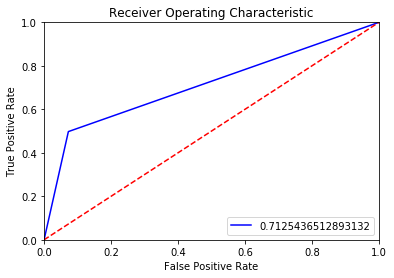

In [50]:
import matplotlib.pyplot as plt
#%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

ROC value based on probability values

In [51]:
from sklearn import metrics

fpr, tpr,z = metrics.roc_curve(Y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr) #(x , y)
print(auc)
print(fpr)
print(tpr)

0.8550267100689473
[0.         0.         0.         ... 0.99865374 0.99892299 1.        ]
[0.00000000e+00 4.27167877e-04 1.28150363e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


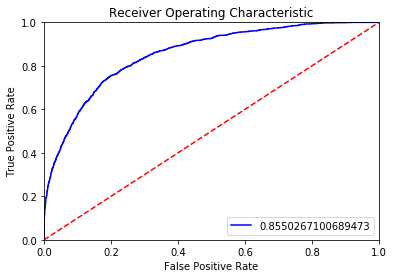

In [52]:
import matplotlib.pyplot as plt
#%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()
#auc value - can be used to select threshold value
#if we have multiple threshold value whose error are similar we can choose a single value based on Auc value

# K-fold validation

In [53]:
classifier=(LogisticRegression()) 

from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)
print(kfold_cv)

from sklearn.model_selection import cross_val_score

kfold_cv_result=cross_val_score(estimator=classifier,X=X_train, y=Y_train, cv=kfold_cv)
print(kfold_cv_result)

print(kfold_cv_result.mean())

KFold(n_splits=10, random_state=None, shuffle=False)
[0.82763158 0.83421053 0.82799473 0.81702501 0.82755595 0.82229048
 0.82755595 0.83501536 0.81439228 0.81614743]
0.8249819288238147
